# FIB - MBA DATA SCIENCE COM ÊNFASE EM MACHINE

#### Alunos: Cesar H Repke / Danilo AP Gonçalves das Neves

#### Biblioteas usadas

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import logging
import seaborn as sns
logging.basicConfig(level=logging.INFO, format='[%(asctime)s %(levelname)s] %(message)s ')
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

#### Lendo os dados

In [3]:
fruits = pd.read_excel('Analise Frutas.xlsx')
fruits.head()

,Dt.Movimento,Variedade,toneladas,ton_analisadas,Analisadas,Carga,Brix,Acidez,Ratio,Calc.,Perc(%),Grama,Caixas,Cx/t
0,2015-01-02,Natal,387.32,291.82,23,12.911,10.09,0.59,17.29,10.20,51.37,21.799604,9493.1,24.5
1,2015-01-02,Pera,348.73,175.30,12,15.851,10.69,0.72,15.04,10.83,56.57,158.898392,8547.3,24.5
2,2015-01-03,Natal,240.18,213.18,16,13.343,10.63,0.67,16.06,10.76,56.00,203.907240,5886.8,24.5
3,2015-01-05,Natal,663.40,532.40,41,13.008,10.98,0.67,16.58,11.11,53.33,205.388784,16259.8,24.5
4,2015-01-05,Pera,287.00,78.28,4,19.133,11.22,0.79,14.39,11.37,57.83,153.453248,7034.3,24.5


#### Quantidade de amostras por variedade

In [4]:
fruits['Variedade'].value_counts()

Pera            1125
Natal            767
Folha Murcha     330
Name: Variedade, dtype: int64

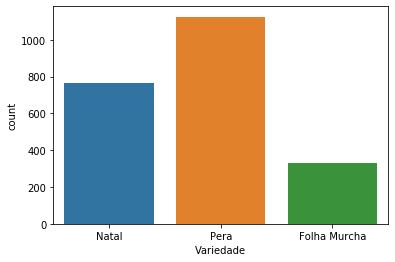

In [5]:
sns.countplot(fruits['Variedade'],label="Count")
plt.show()

#### Removendo colunas que não serão utilizadas

In [6]:
fruits = fruits.drop(['toneladas','ton_analisadas','Carga','Perc(%)','Caixas','Cx/t', 'Dt.Movimento','Analisadas','Calc.'],axis=1)

In [7]:
fruits.describe()

,Brix,Acidez,Ratio,Grama
count,2222.000000,2222.000000,2222.000000,2222.000000
mean,9.862264,0.766166,13.726836,176.396432
std,1.066963,0.191456,5.091963,37.267779
min,6.100000,0.040000,4.610000,21.289602
25%,9.142500,0.640000,11.870000,152.085397
50%,9.810000,0.740000,13.470000,171.202115
75%,10.500000,0.860000,15.050000,199.156185
max,13.770000,2.350000,195.500000,293.202756


#### Apagando todas as linhas quanndo nao temos nenhum valor 

In [8]:
fruits = fruits[fruits.loc[:]!=0].dropna()
fruits.describe()

[2020-04-09 21:15:35,442 INFO] NumExpr defaulting to 4 threads. 


,Brix,Acidez,Ratio,Grama
count,2222.000000,2222.000000,2222.000000,2222.000000
mean,9.862264,0.766166,13.726836,176.396432
std,1.066963,0.191456,5.091963,37.267779
min,6.100000,0.040000,4.610000,21.289602
25%,9.142500,0.640000,11.870000,152.085397
50%,9.810000,0.740000,13.470000,171.202115
75%,10.500000,0.860000,15.050000,199.156185
max,13.770000,2.350000,195.500000,293.202756


#### Criando categorias das variedades

In [9]:
fruits.Variedade = fruits.Variedade.astype('category')
fruits['Cod_Variedade'] = fruits.Variedade.cat.codes
fruits.head()

,Variedade,Brix,Acidez,Ratio,Grama,Cod_Variedade
0,Natal,10.09,0.59,17.29,21.799604,1
1,Pera,10.69,0.72,15.04,158.898392,2
2,Natal,10.63,0.67,16.06,203.907240,1
3,Natal,10.98,0.67,16.58,205.388784,1
4,Pera,11.22,0.79,14.39,153.453248,2


#### Plots das variaves

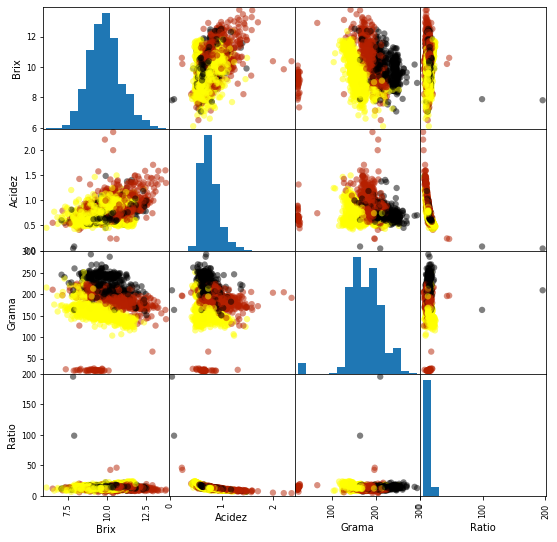

In [10]:
from matplotlib import cm
#Definindo os eixos
feature_names = ['Brix', 'Acidez','Grama','Ratio']
x = fruits[feature_names]
y = fruits['Cod_Variedade']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

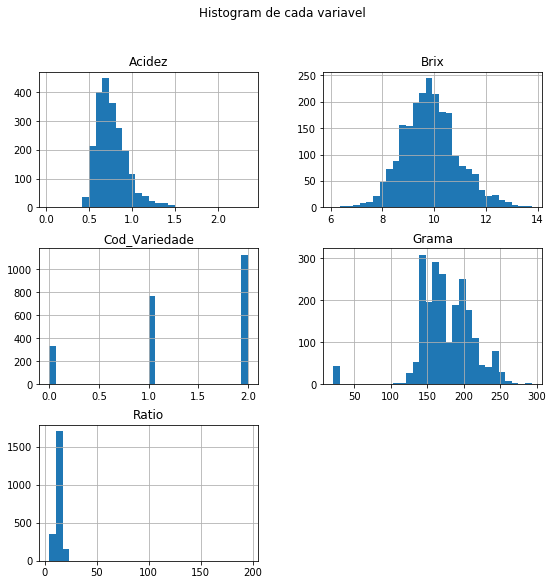

In [11]:
fruits.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram de cada variavel")
plt.show()

### Separando bases de treino e testes

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [13]:
print('Numero de amostras de treino: {}' .format(y_train.count()))
print('Numero de amostras de teste: {}' .format(y_test.count()))

Numero de amostras de treino: 1666
Numero de amostras de teste: 556


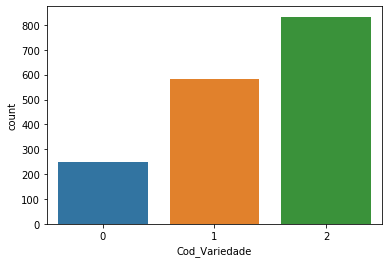

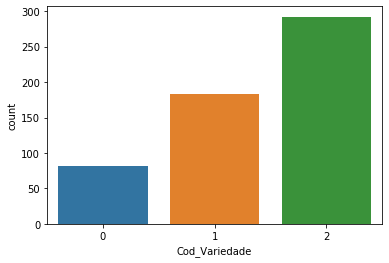

In [14]:
sns.countplot(y_train,label="Treino")
plt.show()
sns.countplot(y_test,label="Teste")
plt.show()

# PCA

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Brix','Acidez','Grama','Ratio']
# Separando as variaveis
x_pca = fruits.loc[:, features].values
# Separando as variedades
y_pca = fruits.loc[:,['Cod_Variedade']].values
# Escalando as variaveis
x_pca = StandardScaler().fit_transform(x_pca)

#### Aplicando PCA

In [16]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_pca)
pca.explained_variance_ratio_

array([0.43254854, 0.25689676, 0.23328439, 0.0772703 ])

##### Os tres principais compnentes ja tem a maioria da explicação dos dados 

In [17]:
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])

In [18]:
df_pca['Variedade'] = fruits.loc[:,['Variedade']].values
df_pca['Cod_Variedade'] = fruits.loc[:,['Cod_Variedade']].values

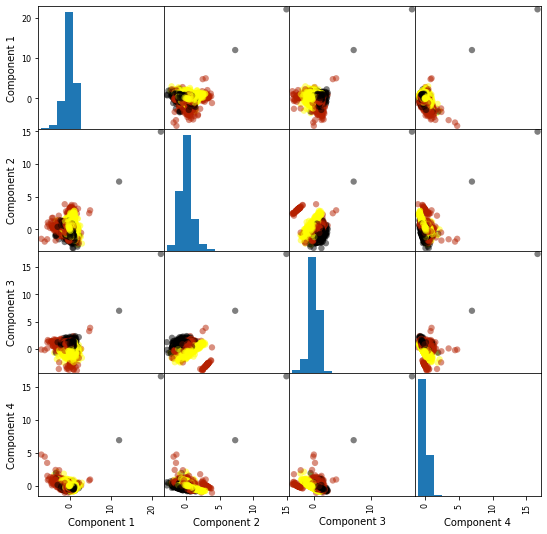

In [19]:
from matplotlib import cm
#Definindo os eixos
feature_names = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
x = df_pca[feature_names]
y = df_pca['Cod_Variedade']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

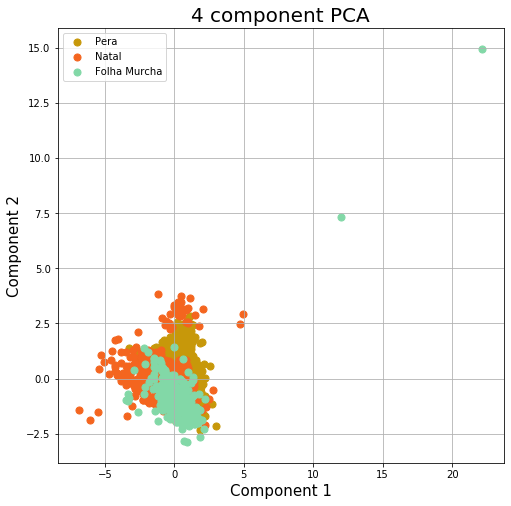

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('4 component PCA', fontsize = 20)
targets = ['Pera', 'Natal', 'Folha Murcha']
colors = ['#C7980A', '#F4651F', '#82D8A7']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['Variedade'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'Component 1']
               , df_pca.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Sepatando dados após o PCA em treinamento e teste

In [21]:
from sklearn.model_selection import train_test_split
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, random_state=0)

## Modelos

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Acurácia Treinamento: {:.2f}%'.format(logreg.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(logreg.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, logreg.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 0.82%
Acurácia Teste: 0.83%
F1 score : 0.76%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Logistic Regression PCA

In [22]:
logreg_pca = LogisticRegression()
logreg_pca.fit(x_pca_train, y_pca_train)

print('Acurácia Treinamento: {:.2f}%'.format(logreg_pca.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(logreg_pca.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, logreg_pca.predict(x_pca_test) , average="macro")*100))

Acurácia Treinamento: 0.89%
Acurácia Teste: 0.88%
F1 score : 0.84%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Quebrando 15% do treino para validacao dos Hiper-parâmetros

In [22]:
x_train_h, x_valid_h, y_train_h, y_valid_h = train_test_split(x_train,
                                                              y_train,
                                                              test_size=0.15,
                                                              random_state=50)

In [23]:
x_pca_train_h, x_pca_valid_h, y_pca_train_h, y_pca_valid_h = train_test_split(x_pca_train,
                                                              y_pca_train,
                                                              test_size=0.15,
                                                              random_state=50)

### Support Vector Machine

In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC()
svm.fit(x_train, y_train)
print('Acurácia Treinamento: {:.2f}%'.format(svm.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(svm.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, svm.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 0.85%
Acurácia Teste: 0.86%
F1 score : 0.82%


### Support Vector Machine PCA

In [27]:
svm_pca = SVC()
svm_pca.fit(x_pca_train, y_pca_train)
print('Acurácia Treinamento: {:.2f}%'.format(svm_pca.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(svm_pca.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, svm_pca.predict(x_pca_test) , average="macro")*100))

Acurácia Treinamento: 0.92%
Acurácia Teste: 0.91%
F1 score : 0.86%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Support Vector Machine - kernel linear

[2020-04-09 20:39:55,959 INFO] C = 0.01   	=> Acurácia-Treinamento = 89.05%	Acurácia-Validação = 85.60% 
[2020-04-09 20:39:56,145 INFO] C = 0.1   	=> Acurácia-Treinamento = 89.62%	Acurácia-Validação = 86.00% 
[2020-04-09 20:39:57,049 INFO] C = 1.0   	=> Acurácia-Treinamento = 89.69%	Acurácia-Validação = 86.40% 
[2020-04-09 20:40:03,502 INFO] C = 10   	=> Acurácia-Treinamento = 89.62%	Acurácia-Validação = 86.80% 
[2020-04-09 20:40:26,271 INFO] C = 100   	=> Acurácia-Treinamento = 89.62%	Acurácia-Validação = 87.20% 
[2020-04-09 20:40:58,495 INFO] C = 1000   	=> Acurácia-Treinamento = 89.48%	Acurácia-Validação = 87.60% 
[2020-04-09 20:41:29,931 INFO] C = 2000   	=> Acurácia-Treinamento = 89.34%	Acurácia-Validação = 87.20% 
[2020-04-09 20:41:29,933 INFO] Melhor score de validação = 87.60%;	Hiper-parâmetro C = 1000 


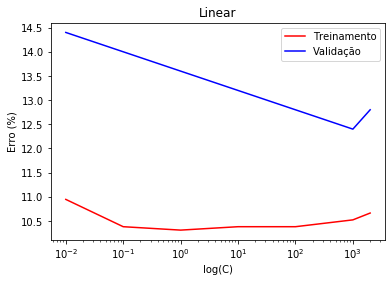

In [28]:
best_classifier = None
best_score = 0.0
train_errors = []
valid_errors = []
C_values = [0.01, 0.1, 1.0, 10, 100, 1000, 2000]
for C in C_values:
    svc = SVC(kernel='linear', C=C).fit(x_train_h, y_train_h)
    score_train = svc.score(x_train_h, y_train_h) * 100.0
    score_valid = svc.score(x_valid_h, y_valid_h) * 100.0
    logging.info('C = {}   \t=> Acurácia-Treinamento = {:.2f}%\tAcurácia-Validação = {:.2f}%'.format(C, score_train, score_valid))
    train_errors.append(100.0 - score_train)
    valid_errors.append(100.0 - score_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_classifier = svc
logging.info('Melhor score de validação = {:.2f}%;\tHiper-parâmetro C = {}'.format(best_score, best_classifier.C))
plt.title('Linear')
plt.xlabel('log(C)')
plt.ylabel('Erro (%)')
plt.semilogx(C_values, train_errors, 'r-', label='Treinamento')
plt.semilogx(C_values, valid_errors, 'b-', label='Validação')
plt.legend()
plt.show()

In [29]:
print('Acurácia Treinamento: {:.2f}%'.format(best_classifier.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(best_classifier.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, best_classifier.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 0.89%
Acurácia Teste: 0.88%
F1 score : 0.84%


#### Support Vector Machine - kernel linear com PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[2020-04-09 20:41:30,671 INFO] C = 0.01   	=> Acurácia-Treinamento = 87.64%	Acurácia-Validação = 84.80% 
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[2020-04-09 20:41:30,698 INFO] C = 0.1   	=> Acurácia-Treinamento = 89.19%	Acurácia-Validação = 85.60% 
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

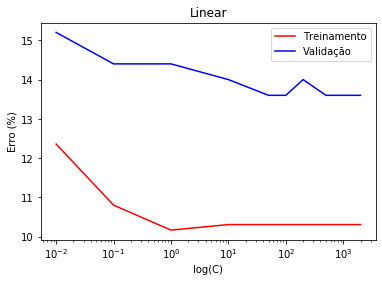

In [30]:
best_classifier = None
best_score = 0.0
train_errors = []
valid_errors = []
C_values = [0.01, 0.1, 1.0, 10,50, 100,200,500,700, 1000, 2000]
for C in C_values:
    svc = SVC(kernel='linear', C=C).fit(x_pca_train_h, y_pca_train_h)
    score_train = svc.score(x_pca_train_h, y_pca_train_h) * 100.0
    score_valid = svc.score(x_pca_valid_h, y_pca_valid_h) * 100.0
    logging.info('C = {}   \t=> Acurácia-Treinamento = {:.2f}%\tAcurácia-Validação = {:.2f}%'.format(C, score_train, score_valid))
    train_errors.append(100.0 - score_train)
    valid_errors.append(100.0 - score_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_classifier = svc
logging.info('Melhor score de validação = {:.2f}%;\tHiper-parâmetro C = {}'.format(best_score, best_classifier.C))
plt.title('Linear')
plt.xlabel('log(C)')
plt.ylabel('Erro (%)')
plt.semilogx(C_values, train_errors, 'r-', label='Treinamento')
plt.semilogx(C_values, valid_errors, 'b-', label='Validação')
plt.legend()
plt.show()

In [31]:
print('Acurácia Treinamento: {:.2f}%'.format(best_classifier.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(best_classifier.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, best_classifier.predict(x_pca_test) , average="macro")*100))

Acurácia Treinamento: 0.89%
Acurácia Teste: 0.89%
F1 score : 0.85%


### K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Acurácia Treinamento: {:.2f}%'.format(knn.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(knn.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, knn.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 0.92%
Acurácia Teste: 0.90%
F1 score : 0.86%


#### Ajustando Hiper-parâmetro KNN

[2020-04-09 20:41:46,610 INFO] n_neighbors = 1  	=> Acurácia-Treinamento = 100.00%	Acurácia-Validação = 85.60% 
[2020-04-09 20:41:46,873 INFO] n_neighbors = 2  	=> Acurácia-Treinamento = 94.92%	Acurácia-Validação = 84.40% 
[2020-04-09 20:41:47,147 INFO] n_neighbors = 3  	=> Acurácia-Treinamento = 94.35%	Acurácia-Validação = 88.80% 
[2020-04-09 20:41:47,416 INFO] n_neighbors = 4  	=> Acurácia-Treinamento = 92.80%	Acurácia-Validação = 89.20% 
[2020-04-09 20:41:47,695 INFO] n_neighbors = 8  	=> Acurácia-Treinamento = 91.60%	Acurácia-Validação = 87.60% 
[2020-04-09 20:41:47,952 INFO] n_neighbors = 10  	=> Acurácia-Treinamento = 91.10%	Acurácia-Validação = 88.00% 
[2020-04-09 20:41:47,953 INFO] Melhor score de validação = 89.20%;	Hiper-parâmetro n_neighbors = 4 


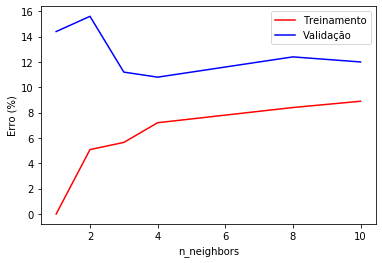

In [34]:
best_classifier = None
best_score = 0.0
train_errors = []
valid_errors = []
N_values = [1, 2, 3, 4, 8, 10]
for N in N_values:
    knn = KNeighborsClassifier(n_neighbors=N, weights='uniform',n_jobs=-1)
    knn.fit(x_train_h, y_train_h)
    score_train = knn.score(x_train_h, y_train_h) * 100.0
    score_valid = knn.score(x_valid_h, y_valid_h) * 100.0
    logging.info('n_neighbors = {}  \t=> Acurácia-Treinamento = {:.2f}%\tAcurácia-Validação = {:.2f}%'.format(N, score_train, score_valid))
    train_errors.append(100.0 - score_train)
    valid_errors.append(100.0 - score_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_classifier = knn
logging.info('Melhor score de validação = {:.2f}%;\tHiper-parâmetro n_neighbors = {}'.format(best_score, best_classifier.n_neighbors))
plt.xlabel('n_neighbors')
plt.ylabel('Erro (%)')
plt.plot(N_values, train_errors, 'r-', label='Treinamento')
plt.plot(N_values, valid_errors, 'b-', label='Validação')
plt.legend()
plt.show()

In [35]:
print('Acurácia Treinamento: {:.2f}%'.format(best_classifier.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(best_classifier.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, best_classifier.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 0.92%
Acurácia Teste: 0.90%
F1 score : 0.86%


### K-Nearest Neighbors PCA

In [36]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_pca_train, y_pca_train)
print('Acurácia Treinamento: {:.2f}%'.format(knn_pca.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(knn_pca.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, knn_pca.predict(x_pca_test) , average="macro")*100))

Acurácia Treinamento: 0.93%
Acurácia Teste: 0.91%
F1 score : 0.87%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#### Ajustando Hiper-parâmetro KNN PCA


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
[2020-04-09 20:41:49,051 INFO] n_neighbors = 1  	=> Acurácia-Treinamento = 100.00%	Acurácia-Validação = 88.00% 
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
[2020-04-09 20:41:49,324 INFO] n_neighbors = 2  	=> Acurácia-Treinamento = 95.06%	Acurácia-Validação = 88.00% 
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
[2020-04-09 20:41:49,612 INFO] n_neighbors = 3  	=> Acurácia-Treinamento = 93.93%	Acurácia-Valid

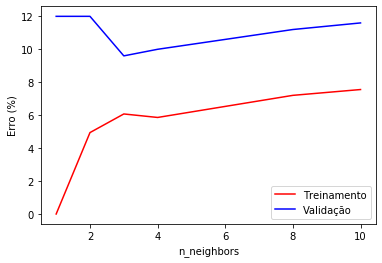

In [37]:
best_classifier = None
best_score = 0.0
train_errors = []
valid_errors = []
N_values = [1, 2, 3, 4, 8, 10]
for N in N_values:
    knn = KNeighborsClassifier(n_neighbors=N, weights='uniform',n_jobs=-1)
    knn.fit(x_pca_train_h, y_pca_train_h)
    score_train = knn.score(x_pca_train_h, y_pca_train_h) * 100.0
    score_valid = knn.score(x_pca_valid_h, y_pca_valid_h) * 100.0
    logging.info('n_neighbors = {}  \t=> Acurácia-Treinamento = {:.2f}%\tAcurácia-Validação = {:.2f}%'.format(N, score_train, score_valid))
    train_errors.append(100.0 - score_train)
    valid_errors.append(100.0 - score_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_classifier = knn
logging.info('Melhor score de validação = {:.2f}%;\tHiper-parâmetro n_neighbors = {}'.format(best_score, best_classifier.n_neighbors))
plt.xlabel('n_neighbors')
plt.ylabel('Erro (%)')
plt.plot(N_values, train_errors, 'r-', label='Treinamento')
plt.plot(N_values, valid_errors, 'b-', label='Validação')
plt.legend()
plt.show()

In [38]:
print('Acurácia Treinamento: {:.2f}%'.format(best_classifier.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(best_classifier.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, best_classifier.predict(x_pca_test) , average="macro")*100))

Acurácia Treinamento: 0.93%
Acurácia Teste: 0.90%
F1 score : 0.86%


### RandomForestClassifier 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier().fit(x_train, y_train)

print('Acurácia Treinamento: {:.2f}%'.format(rfc.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(rfc.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, rfc.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 1.00%
Acurácia Teste: 0.92%
F1 score : 0.89%


[2020-04-09 20:41:52,234 INFO] max_depth = 1    	=> Acurácia-Treinamento = 75.28%	Acurácia-Validação = 73.20% 
[2020-04-09 20:41:52,719 INFO] max_depth = 2    	=> Acurácia-Treinamento = 84.39%	Acurácia-Validação = 80.80% 
[2020-04-09 20:41:53,212 INFO] max_depth = 3    	=> Acurácia-Treinamento = 88.70%	Acurácia-Validação = 82.80% 
[2020-04-09 20:41:53,680 INFO] max_depth = 4    	=> Acurácia-Treinamento = 91.10%	Acurácia-Validação = 86.80% 
[2020-04-09 20:41:54,265 INFO] max_depth = 5    	=> Acurácia-Treinamento = 92.66%	Acurácia-Validação = 86.80% 
[2020-04-09 20:41:54,772 INFO] max_depth = 6    	=> Acurácia-Treinamento = 94.70%	Acurácia-Validação = 87.60% 
[2020-04-09 20:41:55,232 INFO] max_depth = 7    	=> Acurácia-Treinamento = 95.69%	Acurácia-Validação = 87.20% 
[2020-04-09 20:41:55,703 INFO] max_depth = 8    	=> Acurácia-Treinamento = 96.75%	Acurácia-Validação = 88.00% 
[2020-04-09 20:41:56,179 INFO] max_depth = 9    	=> Acurácia-Treinamento = 97.88%	Acurácia-Validação = 88.00% 
[

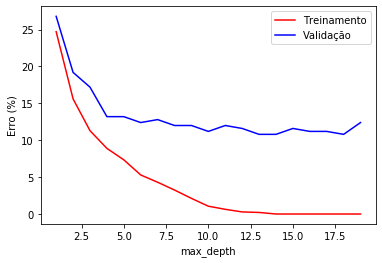

In [41]:
best_classifier = None
best_score = 0.0
train_errors = []
valid_errors = []
N_values = np.arange(1, 20, 1)
for N in N_values:
    rfc = RandomForestClassifier(max_depth=N, n_estimators=100,n_jobs=-1)
    rfc.fit(x_train_h, y_train_h)
    score_train = rfc.score(x_train_h, y_train_h) * 100.0
    score_valid = rfc.score(x_valid_h, y_valid_h) * 100.0
    logging.info('max_depth = {}    \t=> Acurácia-Treinamento = {:.2f}%\tAcurácia-Validação = {:.2f}%'.format(N, score_train, score_valid))
    train_errors.append(100.0 - score_train)
    valid_errors.append(100.0 - score_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_classifier = rfc
logging.info('Melhor score de validação = {:.2f}%;\tHiper-parâmetro max_depth = {}'.format(best_score, best_classifier.max_depth))
plt.xlabel('max_depth')
plt.ylabel('Erro (%)')
plt.plot(N_values, train_errors, 'r-', label='Treinamento')
plt.plot(N_values, valid_errors, 'b-', label='Validação')
plt.legend()
plt.show()

In [42]:
print('Acurácia Treinamento: {:.2f}%'.format(best_classifier.score(x_train, y_train)*100))
print('Acurácia Teste: {:.2f}%' .format(best_classifier.score(x_test, y_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_test, best_classifier.predict(x_test) , average="macro")*100))

Acurácia Treinamento: 0.98%
Acurácia Teste: 0.92%
F1 score : 0.89%


### RandomForestClassifier PCA

In [43]:
rfc = RandomForestClassifier().fit(x_pca_train, y_pca_train)

print('Acurácia Treinamento: {:.2f}%'.format(rfc.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(rfc.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, rfc.predict(x_pca_test) , average="macro")*100))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Acurácia Treinamento: 1.00%
Acurácia Teste: 0.92%
F1 score : 0.89%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[2020-04-09 20:42:02,516 INFO] max_depth = 1    	=> Acurácia-Treinamento = 75.71%	Acurácia-Validação = 72.80% 
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[2020-04-09 20:42:02,981 INFO] max_depth = 2    	=> Acurácia-Treinamento = 81.99%	Acurácia-Validação = 78.80% 
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[2020-04-09 20:42:03,474 INFO] max_depth = 3    	=> Acurácia-Treinamento = 90.32%	Acurácia-Validação

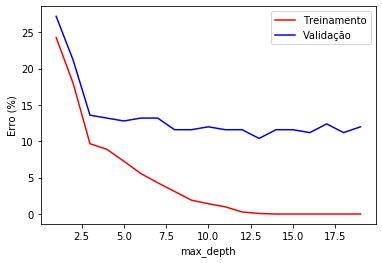

In [44]:
best_classifier = None
best_score = 0.0
train_errors = []
valid_errors = []
N_values = np.arange(1, 20, 1)
for N in N_values:
    rfc = RandomForestClassifier(max_depth=N, n_estimators=100,n_jobs=-1)
    rfc.fit(x_pca_train_h, y_pca_train_h)
    score_train = rfc.score(x_pca_train_h, y_pca_train_h) * 100.0
    score_valid = rfc.score(x_pca_valid_h, y_pca_valid_h) * 100.0
    logging.info('max_depth = {}    \t=> Acurácia-Treinamento = {:.2f}%\tAcurácia-Validação = {:.2f}%'.format(N, score_train, score_valid))
    train_errors.append(100.0 - score_train)
    valid_errors.append(100.0 - score_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_classifier = rfc
logging.info('Melhor score de validação = {:.2f}%;\tHiper-parâmetro max_depth = {}'.format(best_score, best_classifier.max_depth))
plt.xlabel('max_depth')
plt.ylabel('Erro (%)')
plt.plot(N_values, train_errors, 'r-', label='Treinamento')
plt.plot(N_values, valid_errors, 'b-', label='Validação')
plt.legend()
plt.show()

In [48]:
print('Acurácia Treinamento: {:.2f}%'.format(best_classifier.score(x_pca_train, y_pca_train)*100))
print('Acurácia Teste: {:.2f}%' .format(best_classifier.score(x_pca_test, y_pca_test)*100))
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, best_classifier.predict(x_pca_test) , average="macro")*100))

NameError: name 'best_classifier' is not defined

# NLP

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0.1, patience=300)

In [26]:
X = x_train_h.values.astype(float)
X_v = x_test.values.astype(float)

In [27]:
dummy_y = np_utils.to_categorical(y_train_h.values)
dummy_y_v = np_utils.to_categorical(y_test.values)

In [28]:
y_cat, y_pca = np.unique(y_pca, return_inverse=True)

In [29]:
X_PCA = x_pca_train
X_PCA_v = x_pca_test

In [30]:
dummy_y_PCA = np_utils.to_categorical(y_pca_train)
dummy_y_PCA_v = np_utils.to_categorical(y_pca_test)

In [30]:
model = tf.keras.Sequential()
model.add(layers.Dense(50, input_dim=4, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history=model.fit(X,
                  dummy_y,
                  epochs=2000,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1132 samples, validate on 284 samples
Epoch 1/2000
1132/1132 [==============================] - 1s 1ms/sample - loss: 7.0881 - accuracy: 0.3816 - val_loss: 1.7932 - val_accuracy: 0.4085
Epoch 2/2000
1132/1132 [==============================] - 0s 154us/sample - loss: 1.2370 - accuracy: 0.3940 - val_loss: 1.1127 - val_accuracy: 0.3028
Epoch 3/2000
1132/1132 [==============================] - 0s 145us/sample - loss: 1.0462 - accuracy: 0.3940 - val_loss: 1.0842 - val_accuracy: 0.4894
Epoch 4/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.9656 - accuracy: 0.4956 - val_loss: 0.9861 - val_accuracy: 0.4366
Epoch 5/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.9111 - accuracy: 0.5530 - val_loss: 0.9362 - val_accuracy: 0.5211
Epoch 6/2000
1132/1132 [==============================] - 0s 171us/sample - loss: 0.8707 - accuracy: 0.5972 - val_loss: 0.9185 - val_accuracy: 0.5915
Epoch 7/2000
1132/1132 [==============================]

1132/1132 [==============================] - 0s 134us/sample - loss: 0.6499 - accuracy: 0.7518 - val_loss: 0.7632 - val_accuracy: 0.6725
Epoch 56/2000
1132/1132 [==============================] - 0s 122us/sample - loss: 0.6131 - accuracy: 0.7553 - val_loss: 0.7175 - val_accuracy: 0.7113
Epoch 57/2000
1132/1132 [==============================] - 0s 191us/sample - loss: 0.6153 - accuracy: 0.7712 - val_loss: 0.7142 - val_accuracy: 0.7289
Epoch 58/2000
1132/1132 [==============================] - 0s 117us/sample - loss: 0.6173 - accuracy: 0.7712 - val_loss: 0.7866 - val_accuracy: 0.6620
Epoch 59/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.6378 - accuracy: 0.7473 - val_loss: 0.7229 - val_accuracy: 0.7183
Epoch 60/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.6224 - accuracy: 0.7509 - val_loss: 0.7500 - val_accuracy: 0.7042
Epoch 61/2000
1132/1132 [==============================] - 0s 128us/sample - loss: 0.6254 - accuracy: 0.7712

Epoch 163/2000
1132/1132 [==============================] - 0s 131us/sample - loss: 0.5323 - accuracy: 0.8004 - val_loss: 0.5945 - val_accuracy: 0.7746
Epoch 164/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.5281 - accuracy: 0.7968 - val_loss: 0.5801 - val_accuracy: 0.7958
Epoch 165/2000
1132/1132 [==============================] - 0s 133us/sample - loss: 0.5101 - accuracy: 0.8127 - val_loss: 0.6835 - val_accuracy: 0.7394
Epoch 166/2000
1132/1132 [==============================] - 0s 139us/sample - loss: 0.5401 - accuracy: 0.7995 - val_loss: 0.5940 - val_accuracy: 0.7746
Epoch 167/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.5130 - accuracy: 0.8118 - val_loss: 0.6491 - val_accuracy: 0.7042
Epoch 168/2000
1132/1132 [==============================] - 0s 152us/sample - loss: 0.4984 - accuracy: 0.8313 - val_loss: 0.6266 - val_accuracy: 0.7606
Epoch 169/2000
1132/1132 [==============================] - 0s 174us/sample - loss: 0.51

Epoch 270/2000
1132/1132 [==============================] - 0s 131us/sample - loss: 0.4274 - accuracy: 0.8631 - val_loss: 0.4744 - val_accuracy: 0.8063
Epoch 271/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.4303 - accuracy: 0.8428 - val_loss: 0.4684 - val_accuracy: 0.8345
Epoch 272/2000
1132/1132 [==============================] - 0s 133us/sample - loss: 0.4169 - accuracy: 0.8648 - val_loss: 0.4596 - val_accuracy: 0.8556
Epoch 273/2000
1132/1132 [==============================] - 0s 327us/sample - loss: 0.4504 - accuracy: 0.8330 - val_loss: 0.5244 - val_accuracy: 0.8063
Epoch 274/2000
1132/1132 [==============================] - 0s 217us/sample - loss: 0.4293 - accuracy: 0.8507 - val_loss: 0.4941 - val_accuracy: 0.8239
Epoch 275/2000
1132/1132 [==============================] - 0s 195us/sample - loss: 0.4189 - accuracy: 0.8578 - val_loss: 0.4749 - val_accuracy: 0.8063
Epoch 276/2000
1132/1132 [==============================] - 0s 146us/sample - loss: 0.42

Epoch 324/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.3910 - accuracy: 0.8684 - val_loss: 0.4380 - val_accuracy: 0.8556
Epoch 325/2000
1132/1132 [==============================] - 0s 135us/sample - loss: 0.4025 - accuracy: 0.8622 - val_loss: 0.4543 - val_accuracy: 0.8415
Epoch 326/2000
1132/1132 [==============================] - 0s 131us/sample - loss: 0.3890 - accuracy: 0.8754 - val_loss: 0.4278 - val_accuracy: 0.8592
Epoch 327/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.3927 - accuracy: 0.8675 - val_loss: 0.4825 - val_accuracy: 0.8204
Epoch 328/2000
1132/1132 [==============================] - 0s 154us/sample - loss: 0.4414 - accuracy: 0.8392 - val_loss: 0.4378 - val_accuracy: 0.8662
Epoch 329/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.3811 - accuracy: 0.8693 - val_loss: 0.4414 - val_accuracy: 0.8521
Epoch 330/2000
1132/1132 [==============================] - 0s 193us/sample - loss: 0.38

Epoch 378/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.3982 - accuracy: 0.8569 - val_loss: 0.3947 - val_accuracy: 0.8627
Epoch 379/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.3767 - accuracy: 0.8675 - val_loss: 0.3907 - val_accuracy: 0.8732
Epoch 380/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.3622 - accuracy: 0.8860 - val_loss: 0.4237 - val_accuracy: 0.8451
Epoch 381/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.3779 - accuracy: 0.8684 - val_loss: 0.3992 - val_accuracy: 0.8732
Epoch 382/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.3594 - accuracy: 0.8834 - val_loss: 0.4064 - val_accuracy: 0.8768
Epoch 383/2000
1132/1132 [==============================] - 0s 128us/sample - loss: 0.3637 - accuracy: 0.8737 - val_loss: 0.4531 - val_accuracy: 0.8275
Epoch 384/2000
1132/1132 [==============================] - 0s 131us/sample - loss: 0.37

Epoch 432/2000
1132/1132 [==============================] - 0s 166us/sample - loss: 0.3779 - accuracy: 0.8631 - val_loss: 0.4039 - val_accuracy: 0.8627
Epoch 433/2000
1132/1132 [==============================] - 0s 158us/sample - loss: 0.3475 - accuracy: 0.8940 - val_loss: 0.3645 - val_accuracy: 0.8908
Epoch 434/2000
1132/1132 [==============================] - 0s 178us/sample - loss: 0.3496 - accuracy: 0.8913 - val_loss: 0.4095 - val_accuracy: 0.8592
Epoch 435/2000
1132/1132 [==============================] - 0s 161us/sample - loss: 0.3636 - accuracy: 0.8781 - val_loss: 0.3962 - val_accuracy: 0.8521
Epoch 436/2000
1132/1132 [==============================] - 0s 181us/sample - loss: 0.3463 - accuracy: 0.8852 - val_loss: 0.4971 - val_accuracy: 0.7993
Epoch 437/2000
1132/1132 [==============================] - 0s 237us/sample - loss: 0.3492 - accuracy: 0.8852 - val_loss: 0.3638 - val_accuracy: 0.8662
Epoch 438/2000
1132/1132 [==============================] - 0s 179us/sample - loss: 0.33

Epoch 486/2000
1132/1132 [==============================] - 0s 148us/sample - loss: 0.3469 - accuracy: 0.8940 - val_loss: 0.3667 - val_accuracy: 0.8768
Epoch 487/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.3576 - accuracy: 0.8746 - val_loss: 0.3575 - val_accuracy: 0.8768
Epoch 488/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.3371 - accuracy: 0.8896 - val_loss: 0.3766 - val_accuracy: 0.8627
Epoch 489/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.3340 - accuracy: 0.8931 - val_loss: 0.3579 - val_accuracy: 0.8768
Epoch 490/2000
1132/1132 [==============================] - 0s 189us/sample - loss: 0.3419 - accuracy: 0.8834 - val_loss: 0.4035 - val_accuracy: 0.8451
Epoch 491/2000
1132/1132 [==============================] - 0s 198us/sample - loss: 0.3328 - accuracy: 0.8940 - val_loss: 0.3490 - val_accuracy: 0.8732
Epoch 492/2000
1132/1132 [==============================] - 0s 200us/sample - loss: 0.33

Epoch 540/2000
1132/1132 [==============================] - 0s 150us/sample - loss: 0.3814 - accuracy: 0.8551 - val_loss: 0.3803 - val_accuracy: 0.8627
Epoch 541/2000
1132/1132 [==============================] - 0s 148us/sample - loss: 0.3244 - accuracy: 0.8931 - val_loss: 0.3608 - val_accuracy: 0.8662
Epoch 542/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.3402 - accuracy: 0.8754 - val_loss: 0.3309 - val_accuracy: 0.8944
Epoch 543/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.3132 - accuracy: 0.9002 - val_loss: 0.3290 - val_accuracy: 0.9014
Epoch 544/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.3145 - accuracy: 0.8975 - val_loss: 0.3369 - val_accuracy: 0.8908
Epoch 545/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.3400 - accuracy: 0.8754 - val_loss: 0.4540 - val_accuracy: 0.8099
Epoch 546/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.33

Epoch 594/2000
1132/1132 [==============================] - 0s 145us/sample - loss: 0.3101 - accuracy: 0.8958 - val_loss: 0.3182 - val_accuracy: 0.9014
Epoch 595/2000
1132/1132 [==============================] - 0s 172us/sample - loss: 0.3034 - accuracy: 0.9046 - val_loss: 0.3335 - val_accuracy: 0.8908
Epoch 596/2000
1132/1132 [==============================] - 0s 212us/sample - loss: 0.3134 - accuracy: 0.8975 - val_loss: 0.3225 - val_accuracy: 0.8908
Epoch 597/2000
1132/1132 [==============================] - 0s 133us/sample - loss: 0.3086 - accuracy: 0.9019 - val_loss: 0.3486 - val_accuracy: 0.8662
Epoch 598/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.3130 - accuracy: 0.8984 - val_loss: 0.3235 - val_accuracy: 0.8944
Epoch 599/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.3044 - accuracy: 0.9046 - val_loss: 0.3652 - val_accuracy: 0.8732
Epoch 600/2000
1132/1132 [==============================] - 0s 131us/sample - loss: 0.31

Epoch 701/2000
1132/1132 [==============================] - 0s 134us/sample - loss: 0.2897 - accuracy: 0.9081 - val_loss: 0.2993 - val_accuracy: 0.9085
Epoch 702/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.3073 - accuracy: 0.9028 - val_loss: 0.3169 - val_accuracy: 0.8838
Epoch 703/2000
1132/1132 [==============================] - 0s 133us/sample - loss: 0.3086 - accuracy: 0.8975 - val_loss: 0.3021 - val_accuracy: 0.8979
Epoch 704/2000
1132/1132 [==============================] - 0s 143us/sample - loss: 0.2922 - accuracy: 0.9002 - val_loss: 0.3742 - val_accuracy: 0.8556
Epoch 705/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.3247 - accuracy: 0.8852 - val_loss: 0.3634 - val_accuracy: 0.8592
Epoch 706/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.3085 - accuracy: 0.8949 - val_loss: 0.3085 - val_accuracy: 0.8873
Epoch 707/2000
1132/1132 [==============================] - 0s 150us/sample - loss: 0.29

Epoch 755/2000
1132/1132 [==============================] - 0s 157us/sample - loss: 0.2998 - accuracy: 0.9019 - val_loss: 0.3075 - val_accuracy: 0.8979
Epoch 756/2000
1132/1132 [==============================] - 0s 158us/sample - loss: 0.2984 - accuracy: 0.9064 - val_loss: 0.3041 - val_accuracy: 0.8873
Epoch 757/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.3340 - accuracy: 0.8860 - val_loss: 0.2913 - val_accuracy: 0.9155
Epoch 758/2000
1132/1132 [==============================] - 0s 199us/sample - loss: 0.2896 - accuracy: 0.9019 - val_loss: 0.3219 - val_accuracy: 0.8803
Epoch 759/2000
1132/1132 [==============================] - 0s 164us/sample - loss: 0.2822 - accuracy: 0.9072 - val_loss: 0.3358 - val_accuracy: 0.8697
Epoch 760/2000
1132/1132 [==============================] - 0s 168us/sample - loss: 0.2929 - accuracy: 0.9125 - val_loss: 0.2957 - val_accuracy: 0.9085
Epoch 761/2000
1132/1132 [==============================] - 0s 203us/sample - loss: 0.30

Epoch 862/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.2680 - accuracy: 0.9152 - val_loss: 0.3368 - val_accuracy: 0.8803
Epoch 863/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.3226 - accuracy: 0.8843 - val_loss: 0.3698 - val_accuracy: 0.8768
Epoch 864/2000
1132/1132 [==============================] - 0s 151us/sample - loss: 0.2959 - accuracy: 0.8966 - val_loss: 0.3107 - val_accuracy: 0.8908
Epoch 865/2000
1132/1132 [==============================] - 0s 188us/sample - loss: 0.2966 - accuracy: 0.9081 - val_loss: 0.3219 - val_accuracy: 0.8838
Epoch 866/2000
1132/1132 [==============================] - 0s 156us/sample - loss: 0.3165 - accuracy: 0.8922 - val_loss: 0.3072 - val_accuracy: 0.8873
Epoch 867/2000
1132/1132 [==============================] - 0s 201us/sample - loss: 0.2831 - accuracy: 0.9037 - val_loss: 0.2903 - val_accuracy: 0.9014
Epoch 868/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.29

Epoch 916/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.2834 - accuracy: 0.9072 - val_loss: 0.2931 - val_accuracy: 0.8908
Epoch 917/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.2770 - accuracy: 0.9161 - val_loss: 0.3016 - val_accuracy: 0.8838
Epoch 918/2000
1132/1132 [==============================] - 0s 131us/sample - loss: 0.2731 - accuracy: 0.9117 - val_loss: 0.3036 - val_accuracy: 0.8838
Epoch 919/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.3090 - accuracy: 0.8958 - val_loss: 0.4156 - val_accuracy: 0.8592
Epoch 920/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.3067 - accuracy: 0.9011 - val_loss: 0.3106 - val_accuracy: 0.8873
Epoch 921/2000
1132/1132 [==============================] - 0s 167us/sample - loss: 0.3094 - accuracy: 0.9019 - val_loss: 0.2815 - val_accuracy: 0.9120
Epoch 922/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.27

Epoch 970/2000
1132/1132 [==============================] - 0s 127us/sample - loss: 0.2765 - accuracy: 0.9178 - val_loss: 0.3339 - val_accuracy: 0.8768
Epoch 971/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.2835 - accuracy: 0.9117 - val_loss: 0.2777 - val_accuracy: 0.9085
Epoch 972/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.2867 - accuracy: 0.9081 - val_loss: 0.3024 - val_accuracy: 0.8803
Epoch 973/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2861 - accuracy: 0.9072 - val_loss: 0.2897 - val_accuracy: 0.9014
Epoch 974/2000
1132/1132 [==============================] - 0s 127us/sample - loss: 0.2718 - accuracy: 0.9134 - val_loss: 0.3019 - val_accuracy: 0.8838
Epoch 975/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.2794 - accuracy: 0.9161 - val_loss: 0.2884 - val_accuracy: 0.8979
Epoch 976/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.27

Epoch 1024/2000
1132/1132 [==============================] - 0s 126us/sample - loss: 0.2803 - accuracy: 0.9072 - val_loss: 0.2849 - val_accuracy: 0.9014
Epoch 1025/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.2761 - accuracy: 0.9143 - val_loss: 0.2919 - val_accuracy: 0.9014
Epoch 1026/2000
1132/1132 [==============================] - 0s 155us/sample - loss: 0.2818 - accuracy: 0.9117 - val_loss: 0.3312 - val_accuracy: 0.8768
Epoch 1027/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.2675 - accuracy: 0.9125 - val_loss: 0.3450 - val_accuracy: 0.8732
Epoch 1028/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.2958 - accuracy: 0.8931 - val_loss: 0.2964 - val_accuracy: 0.8908
Epoch 1029/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.3128 - accuracy: 0.8949 - val_loss: 0.4490 - val_accuracy: 0.8310
Epoch 1030/2000
1132/1132 [==============================] - 0s 154us/sample - los

1132/1132 [==============================] - 0s 147us/sample - loss: 0.3128 - accuracy: 0.9019 - val_loss: 0.3255 - val_accuracy: 0.8838
Epoch 1131/2000
1132/1132 [==============================] - 0s 143us/sample - loss: 0.2760 - accuracy: 0.9072 - val_loss: 0.2735 - val_accuracy: 0.9085
Epoch 1132/2000
1132/1132 [==============================] - 0s 145us/sample - loss: 0.2725 - accuracy: 0.9170 - val_loss: 0.3104 - val_accuracy: 0.8873
Epoch 1133/2000
1132/1132 [==============================] - 0s 146us/sample - loss: 0.2775 - accuracy: 0.9170 - val_loss: 0.2771 - val_accuracy: 0.9120
Epoch 1134/2000
1132/1132 [==============================] - 0s 133us/sample - loss: 0.2943 - accuracy: 0.9011 - val_loss: 0.3363 - val_accuracy: 0.8732
Epoch 1135/2000
1132/1132 [==============================] - 0s 127us/sample - loss: 0.3116 - accuracy: 0.8878 - val_loss: 0.2724 - val_accuracy: 0.9155
Epoch 1136/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.2851 - accu

1132/1132 [==============================] - 0s 131us/sample - loss: 0.2961 - accuracy: 0.9002 - val_loss: 0.2866 - val_accuracy: 0.8944
Epoch 1237/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.2637 - accuracy: 0.9117 - val_loss: 0.2778 - val_accuracy: 0.9049
Epoch 1238/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.2761 - accuracy: 0.9152 - val_loss: 0.2746 - val_accuracy: 0.9085
Epoch 1239/2000
1132/1132 [==============================] - 0s 248us/sample - loss: 0.2675 - accuracy: 0.9196 - val_loss: 0.3004 - val_accuracy: 0.8768
Epoch 1240/2000
1132/1132 [==============================] - 0s 204us/sample - loss: 0.2713 - accuracy: 0.9125 - val_loss: 0.2707 - val_accuracy: 0.9190
Epoch 1241/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2819 - accuracy: 0.9108 - val_loss: 0.2722 - val_accuracy: 0.9085
Epoch 1242/2000
1132/1132 [==============================] - 0s 125us/sample - loss: 0.2786 - accu

1132/1132 [==============================] - ETA: 0s - loss: 0.3930 - accuracy: 0.86 - 0s 161us/sample - loss: 0.3567 - accuracy: 0.8737 - val_loss: 0.3082 - val_accuracy: 0.8944
Epoch 1343/2000
1132/1132 [==============================] - 0s 132us/sample - loss: 0.2751 - accuracy: 0.9090 - val_loss: 0.2681 - val_accuracy: 0.9155
Epoch 1344/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2702 - accuracy: 0.9170 - val_loss: 0.2701 - val_accuracy: 0.9014
Epoch 1345/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2643 - accuracy: 0.9170 - val_loss: 0.2691 - val_accuracy: 0.9225
Epoch 1346/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2699 - accuracy: 0.9170 - val_loss: 0.2705 - val_accuracy: 0.9155
Epoch 1347/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2585 - accuracy: 0.9117 - val_loss: 0.3223 - val_accuracy: 0.8803
Epoch 1348/2000
1132/1132 [=============================

1132/1132 [==============================] - 0s 143us/sample - loss: 0.2644 - accuracy: 0.9125 - val_loss: 0.3233 - val_accuracy: 0.8908
Epoch 1449/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2952 - accuracy: 0.9019 - val_loss: 0.3948 - val_accuracy: 0.8169
Epoch 1450/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2980 - accuracy: 0.9046 - val_loss: 0.2752 - val_accuracy: 0.8979
Epoch 1451/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.2686 - accuracy: 0.9108 - val_loss: 0.2687 - val_accuracy: 0.9014
Epoch 1452/2000
1132/1132 [==============================] - 0s 148us/sample - loss: 0.2581 - accuracy: 0.9196 - val_loss: 0.2694 - val_accuracy: 0.9120
Epoch 1453/2000
1132/1132 [==============================] - 0s 285us/sample - loss: 0.2692 - accuracy: 0.9170 - val_loss: 0.2745 - val_accuracy: 0.8944
Epoch 1454/2000
1132/1132 [==============================] - 0s 182us/sample - loss: 0.2731 - accu

1132/1132 [==============================] - 0s 214us/sample - loss: 0.2724 - accuracy: 0.9046 - val_loss: 0.3048 - val_accuracy: 0.8944
Epoch 1555/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.2693 - accuracy: 0.9090 - val_loss: 0.2657 - val_accuracy: 0.9085
Epoch 1556/2000
1132/1132 [==============================] - 0s 138us/sample - loss: 0.2672 - accuracy: 0.9178 - val_loss: 0.2988 - val_accuracy: 0.8873
Epoch 1557/2000
1132/1132 [==============================] - 0s 134us/sample - loss: 0.2682 - accuracy: 0.9108 - val_loss: 0.2764 - val_accuracy: 0.9120
Epoch 1558/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.2749 - accuracy: 0.9099 - val_loss: 0.2703 - val_accuracy: 0.9155
Epoch 1559/2000
1132/1132 [==============================] - 0s 146us/sample - loss: 0.2604 - accuracy: 0.9134 - val_loss: 0.2944 - val_accuracy: 0.8873
Epoch 1560/2000
1132/1132 [==============================] - 0s 173us/sample - loss: 0.2699 - accu

1132/1132 [==============================] - 0s 148us/sample - loss: 0.2585 - accuracy: 0.9161 - val_loss: 0.2863 - val_accuracy: 0.9049
Epoch 1661/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.2795 - accuracy: 0.9002 - val_loss: 0.2820 - val_accuracy: 0.9014
Epoch 1662/2000
1132/1132 [==============================] - 0s 129us/sample - loss: 0.2662 - accuracy: 0.9099 - val_loss: 0.2811 - val_accuracy: 0.9049
Epoch 1663/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2724 - accuracy: 0.9108 - val_loss: 0.2971 - val_accuracy: 0.8838
Epoch 1664/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.2658 - accuracy: 0.9081 - val_loss: 0.2753 - val_accuracy: 0.9049
Epoch 1665/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2602 - accuracy: 0.9205 - val_loss: 0.2855 - val_accuracy: 0.8944
Epoch 1666/2000
1132/1132 [==============================] - 0s 146us/sample - loss: 0.2744 - accu

1132/1132 [==============================] - 0s 136us/sample - loss: 0.2792 - accuracy: 0.9019 - val_loss: 0.2754 - val_accuracy: 0.8908
Epoch 1767/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2530 - accuracy: 0.9170 - val_loss: 0.3063 - val_accuracy: 0.8768
Epoch 1768/2000
1132/1132 [==============================] - 0s 142us/sample - loss: 0.2494 - accuracy: 0.9187 - val_loss: 0.2735 - val_accuracy: 0.8944
Epoch 1769/2000
1132/1132 [==============================] - 0s 135us/sample - loss: 0.2542 - accuracy: 0.9152 - val_loss: 0.2819 - val_accuracy: 0.8979
Epoch 1770/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.2822 - accuracy: 0.9011 - val_loss: 0.2781 - val_accuracy: 0.8979
Epoch 1771/2000
1132/1132 [==============================] - 0s 142us/sample - loss: 0.2694 - accuracy: 0.9117 - val_loss: 0.2873 - val_accuracy: 0.8838
Epoch 1772/2000
1132/1132 [==============================] - 0s 164us/sample - loss: 0.2726 - accu

In [47]:
model.evaluate(X_v, dummy_y_v)

556/556 [==============================] - 0s 435us/sample - loss: 0.2977 - accuracy: 0.9119


[0.29773502469920426, 0.9118705]

In [48]:
y_pred1 = model.predict(X_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_test, y_pred , average="macro")*100))


F1 score : 0.87%


In [ ]:
# Mesma rede com PCA

In [34]:
model_PCA = tf.keras.Sequential()
model_PCA.add(layers.Dense(50, input_dim=4, activation='relu'))
model_PCA.add(layers.Dense(3, activation='softmax'))
model_PCA.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history=model_PCA.fit(X_PCA,
                  dummy_y_PCA,
                  epochs=2000,
                  #batch_size=5,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1332 samples, validate on 334 samples
Epoch 1/2000
1332/1332 [==============================] - 1s 828us/sample - loss: 1.0937 - accuracy: 0.4264 - val_loss: 1.0440 - val_accuracy: 0.7156
Epoch 2/2000
1332/1332 [==============================] - 0s 209us/sample - loss: 0.8953 - accuracy: 0.7508 - val_loss: 0.8610 - val_accuracy: 0.7814
Epoch 3/2000
1332/1332 [==============================] - 0s 152us/sample - loss: 0.7644 - accuracy: 0.7935 - val_loss: 0.7467 - val_accuracy: 0.8293
Epoch 4/2000
1332/1332 [==============================] - 0s 162us/sample - loss: 0.6766 - accuracy: 0.8213 - val_loss: 0.6751 - val_accuracy: 0.8323
Epoch 5/2000
1332/1332 [==============================] - 0s 257us/sample - loss: 0.6170 - accuracy: 0.8453 - val_loss: 0.6236 - val_accuracy: 0.8473
Epoch 6/2000
1332/1332 [==============================] - 0s 207us/sample - loss: 0.5728 - accuracy: 0.8581 - val_loss: 0.5907 - val_accuracy: 0.8713
Epoch 7/2000
1332/1332 [=============================

1332/1332 [==============================] - 0s 184us/sample - loss: 0.2251 - accuracy: 0.9182 - val_loss: 0.4197 - val_accuracy: 0.9281
Epoch 56/2000
1332/1332 [==============================] - 0s 197us/sample - loss: 0.2258 - accuracy: 0.9197 - val_loss: 0.4201 - val_accuracy: 0.9281
Epoch 57/2000
1332/1332 [==============================] - 0s 297us/sample - loss: 0.2265 - accuracy: 0.9144 - val_loss: 0.4190 - val_accuracy: 0.9281
Epoch 58/2000
1332/1332 [==============================] - 0s 251us/sample - loss: 0.2240 - accuracy: 0.9204 - val_loss: 0.4187 - val_accuracy: 0.9281
Epoch 59/2000
1332/1332 [==============================] - 0s 218us/sample - loss: 0.2238 - accuracy: 0.9197 - val_loss: 0.4219 - val_accuracy: 0.9281
Epoch 60/2000
1332/1332 [==============================] - 0s 296us/sample - loss: 0.2235 - accuracy: 0.9197 - val_loss: 0.4250 - val_accuracy: 0.9311
Epoch 61/2000
1332/1332 [==============================] - 0s 326us/sample - loss: 0.2231 - accuracy: 0.9189

Epoch 163/2000
1332/1332 [==============================] - 0s 143us/sample - loss: 0.2007 - accuracy: 0.9257 - val_loss: 0.5885 - val_accuracy: 0.9281
Epoch 164/2000
1332/1332 [==============================] - 0s 153us/sample - loss: 0.2015 - accuracy: 0.9234 - val_loss: 0.5952 - val_accuracy: 0.9281
Epoch 165/2000
1332/1332 [==============================] - 0s 138us/sample - loss: 0.1998 - accuracy: 0.9227 - val_loss: 0.5945 - val_accuracy: 0.9222
Epoch 166/2000
1332/1332 [==============================] - 0s 139us/sample - loss: 0.2021 - accuracy: 0.9227 - val_loss: 0.5946 - val_accuracy: 0.9251
Epoch 167/2000
1332/1332 [==============================] - 0s 136us/sample - loss: 0.2008 - accuracy: 0.9234 - val_loss: 0.5982 - val_accuracy: 0.9281
Epoch 168/2000
1332/1332 [==============================] - 0s 139us/sample - loss: 0.2007 - accuracy: 0.9234 - val_loss: 0.5947 - val_accuracy: 0.9281
Epoch 169/2000
1332/1332 [==============================] - 0s 147us/sample - loss: 0.20

Epoch 217/2000
1332/1332 [==============================] - 0s 159us/sample - loss: 0.1965 - accuracy: 0.9257 - val_loss: 0.6256 - val_accuracy: 0.9281
Epoch 218/2000
1332/1332 [==============================] - 0s 139us/sample - loss: 0.1955 - accuracy: 0.9264 - val_loss: 0.6162 - val_accuracy: 0.9222
Epoch 219/2000
1332/1332 [==============================] - 0s 158us/sample - loss: 0.1956 - accuracy: 0.9249 - val_loss: 0.6210 - val_accuracy: 0.9281
Epoch 220/2000
1332/1332 [==============================] - 0s 164us/sample - loss: 0.1965 - accuracy: 0.9249 - val_loss: 0.6181 - val_accuracy: 0.9281
Epoch 221/2000
1332/1332 [==============================] - 0s 137us/sample - loss: 0.1958 - accuracy: 0.9234 - val_loss: 0.6209 - val_accuracy: 0.9222
Epoch 222/2000
1332/1332 [==============================] - 0s 153us/sample - loss: 0.1964 - accuracy: 0.9264 - val_loss: 0.6245 - val_accuracy: 0.9281
Epoch 223/2000
1332/1332 [==============================] - 0s 166us/sample - loss: 0.19

Epoch 271/2000
1332/1332 [==============================] - 0s 170us/sample - loss: 0.1930 - accuracy: 0.9279 - val_loss: 0.6146 - val_accuracy: 0.9281
Epoch 272/2000
1332/1332 [==============================] - 0s 228us/sample - loss: 0.1930 - accuracy: 0.9264 - val_loss: 0.6215 - val_accuracy: 0.9311
Epoch 273/2000
1332/1332 [==============================] - 0s 147us/sample - loss: 0.1931 - accuracy: 0.9309 - val_loss: 0.6225 - val_accuracy: 0.9281
Epoch 274/2000
1332/1332 [==============================] - 0s 140us/sample - loss: 0.1924 - accuracy: 0.9294 - val_loss: 0.6230 - val_accuracy: 0.9281
Epoch 275/2000
1332/1332 [==============================] - 0s 144us/sample - loss: 0.1932 - accuracy: 0.9272 - val_loss: 0.6204 - val_accuracy: 0.9281
Epoch 276/2000
1332/1332 [==============================] - 0s 144us/sample - loss: 0.1921 - accuracy: 0.9272 - val_loss: 0.6196 - val_accuracy: 0.9281
Epoch 277/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.19

Epoch 325/2000
1332/1332 [==============================] - 0s 173us/sample - loss: 0.1914 - accuracy: 0.9279 - val_loss: 0.6180 - val_accuracy: 0.9251
Epoch 326/2000
1332/1332 [==============================] - 0s 143us/sample - loss: 0.1910 - accuracy: 0.9279 - val_loss: 0.6250 - val_accuracy: 0.9281
Epoch 00326: early stopping


In [49]:
model_PCA.evaluate(X_PCA_v, dummy_y_PCA_v)

556/556 [==============================] - 0s 126us/sample - loss: 0.2434 - accuracy: 0.9119


[0.24338029914622683, 0.9118705]

In [50]:
y_pred1 = model_PCA.predict(X_PCA_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, y_pred , average="macro")*100))

F1 score : 0.87%


In [ ]:
# mais camadas

In [51]:
model2 = tf.keras.Sequential()
model2.add(layers.Dense(50, input_dim=4, activation='relu'))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history=model2.fit(X,
                  dummy_y,
                  epochs=2000,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1132 samples, validate on 284 samples
Epoch 1/2000
1132/1132 [==============================] - 1s 1ms/sample - loss: 4.2483 - accuracy: 0.3825 - val_loss: 1.1553 - val_accuracy: 0.3697
Epoch 2/2000
1132/1132 [==============================] - 0s 155us/sample - loss: 1.4724 - accuracy: 0.3834 - val_loss: 1.0287 - val_accuracy: 0.4894
Epoch 3/2000
1132/1132 [==============================] - 0s 163us/sample - loss: 1.1757 - accuracy: 0.4435 - val_loss: 1.0025 - val_accuracy: 0.4930
Epoch 4/2000
1132/1132 [==============================] - 0s 179us/sample - loss: 1.0626 - accuracy: 0.4859 - val_loss: 0.9526 - val_accuracy: 0.4648
Epoch 5/2000
1132/1132 [==============================] - 0s 178us/sample - loss: 1.0117 - accuracy: 0.5247 - val_loss: 0.9156 - val_accuracy: 0.5211
Epoch 6/2000
1132/1132 [==============================] - 0s 255us/sample - loss: 0.9309 - accuracy: 0.5910 - val_loss: 0.9052 - val_accuracy: 0.5317
Epoch 7/2000
1132/1132 [==============================]

1132/1132 [==============================] - 0s 193us/sample - loss: 0.5548 - accuracy: 0.7889 - val_loss: 0.5674 - val_accuracy: 0.7676
Epoch 56/2000
1132/1132 [==============================] - 0s 172us/sample - loss: 0.5508 - accuracy: 0.7809 - val_loss: 0.5830 - val_accuracy: 0.7887
Epoch 57/2000
1132/1132 [==============================] - 0s 177us/sample - loss: 0.5279 - accuracy: 0.7968 - val_loss: 0.6210 - val_accuracy: 0.7113
Epoch 58/2000
1132/1132 [==============================] - 0s 215us/sample - loss: 0.5590 - accuracy: 0.7739 - val_loss: 0.5540 - val_accuracy: 0.7641
Epoch 59/2000
1132/1132 [==============================] - 0s 162us/sample - loss: 0.5367 - accuracy: 0.7933 - val_loss: 0.7748 - val_accuracy: 0.6761
Epoch 60/2000
1132/1132 [==============================] - 0s 236us/sample - loss: 0.5236 - accuracy: 0.7968 - val_loss: 0.5994 - val_accuracy: 0.7782
Epoch 61/2000
1132/1132 [==============================] - 0s 159us/sample - loss: 0.5457 - accuracy: 0.7818

Epoch 163/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.3556 - accuracy: 0.8737 - val_loss: 0.7180 - val_accuracy: 0.7254
Epoch 164/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.3540 - accuracy: 0.8666 - val_loss: 0.7619 - val_accuracy: 0.7042
Epoch 165/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.3887 - accuracy: 0.8525 - val_loss: 0.9673 - val_accuracy: 0.6444
Epoch 166/2000
1132/1132 [==============================] - 0s 143us/sample - loss: 0.3331 - accuracy: 0.8843 - val_loss: 0.6843 - val_accuracy: 0.7324
Epoch 167/2000
1132/1132 [==============================] - 0s 148us/sample - loss: 0.3240 - accuracy: 0.8852 - val_loss: 0.7046 - val_accuracy: 0.7324
Epoch 168/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.3143 - accuracy: 0.8958 - val_loss: 1.0266 - val_accuracy: 0.6232
Epoch 169/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.33

Epoch 217/2000
1132/1132 [==============================] - 0s 297us/sample - loss: 0.3296 - accuracy: 0.8843 - val_loss: 0.5423 - val_accuracy: 0.8028
Epoch 218/2000
1132/1132 [==============================] - 0s 145us/sample - loss: 0.2829 - accuracy: 0.9011 - val_loss: 1.0655 - val_accuracy: 0.6197
Epoch 219/2000
1132/1132 [==============================] - 0s 148us/sample - loss: 0.3253 - accuracy: 0.8860 - val_loss: 0.7889 - val_accuracy: 0.6972
Epoch 220/2000
1132/1132 [==============================] - 0s 161us/sample - loss: 0.2956 - accuracy: 0.8966 - val_loss: 0.7935 - val_accuracy: 0.6831
Epoch 221/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.3419 - accuracy: 0.8754 - val_loss: 1.2516 - val_accuracy: 0.5493
Epoch 222/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.3651 - accuracy: 0.8719 - val_loss: 0.5953 - val_accuracy: 0.7817
Epoch 223/2000
1132/1132 [==============================] - 0s 149us/sample - loss: 0.31

Epoch 271/2000
1132/1132 [==============================] - 0s 253us/sample - loss: 0.3249 - accuracy: 0.8843 - val_loss: 0.4593 - val_accuracy: 0.8415
Epoch 272/2000
1132/1132 [==============================] - 0s 227us/sample - loss: 0.3149 - accuracy: 0.8825 - val_loss: 0.4810 - val_accuracy: 0.8310
Epoch 273/2000
1132/1132 [==============================] - 0s 158us/sample - loss: 0.3248 - accuracy: 0.8825 - val_loss: 0.9242 - val_accuracy: 0.6620
Epoch 274/2000
1132/1132 [==============================] - 0s 152us/sample - loss: 0.3230 - accuracy: 0.8852 - val_loss: 0.4593 - val_accuracy: 0.8380
Epoch 275/2000
1132/1132 [==============================] - 0s 220us/sample - loss: 0.3151 - accuracy: 0.8887 - val_loss: 0.5673 - val_accuracy: 0.7958
Epoch 276/2000
1132/1132 [==============================] - 0s 168us/sample - loss: 0.2993 - accuracy: 0.8949 - val_loss: 0.8419 - val_accuracy: 0.6901
Epoch 277/2000
1132/1132 [==============================] - 0s 159us/sample - loss: 0.31

Epoch 325/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2795 - accuracy: 0.9037 - val_loss: 0.8598 - val_accuracy: 0.6972
Epoch 326/2000
1132/1132 [==============================] - 0s 152us/sample - loss: 0.3200 - accuracy: 0.8869 - val_loss: 0.7734 - val_accuracy: 0.7324
Epoch 327/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.3033 - accuracy: 0.8887 - val_loss: 0.8244 - val_accuracy: 0.7042
Epoch 328/2000
1132/1132 [==============================] - 0s 149us/sample - loss: 0.3201 - accuracy: 0.8852 - val_loss: 0.7186 - val_accuracy: 0.7254
Epoch 329/2000
1132/1132 [==============================] - 0s 139us/sample - loss: 0.3857 - accuracy: 0.8525 - val_loss: 0.7952 - val_accuracy: 0.6937
Epoch 330/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2967 - accuracy: 0.8975 - val_loss: 0.5543 - val_accuracy: 0.7887
Epoch 331/2000
1132/1132 [==============================] - 0s 134us/sample - loss: 0.30

Epoch 379/2000
1132/1132 [==============================] - 0s 171us/sample - loss: 0.2894 - accuracy: 0.8984 - val_loss: 0.4037 - val_accuracy: 0.8556
Epoch 380/2000
1132/1132 [==============================] - 0s 165us/sample - loss: 0.3339 - accuracy: 0.8701 - val_loss: 0.8784 - val_accuracy: 0.6831
Epoch 381/2000
1132/1132 [==============================] - 0s 156us/sample - loss: 0.2983 - accuracy: 0.8966 - val_loss: 0.6128 - val_accuracy: 0.7817
Epoch 382/2000
1132/1132 [==============================] - 0s 142us/sample - loss: 0.2885 - accuracy: 0.8984 - val_loss: 1.0951 - val_accuracy: 0.6232
Epoch 383/2000
1132/1132 [==============================] - 0s 167us/sample - loss: 0.3174 - accuracy: 0.8878 - val_loss: 1.2673 - val_accuracy: 0.5810
Epoch 384/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.2932 - accuracy: 0.8993 - val_loss: 0.6471 - val_accuracy: 0.7746
Epoch 385/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.28

In [53]:
model2.evaluate(X_v, dummy_y_v)

556/556 [==============================] - 0s 115us/sample - loss: 0.4020 - accuracy: 0.8651


[0.40204786696879985, 0.8651079]

In [54]:
y_pred1 = model2.predict(X_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_test, y_pred , average="macro")*100))

F1 score : 0.82%


In [ ]:
# Mesma rede com PCA

In [55]:
model_PCA2 = tf.keras.Sequential()
model_PCA2.add(layers.Dense(50, input_dim=4, activation='relu'))
model_PCA2.add(layers.Dense(50, activation='relu'))
model_PCA2.add(layers.Dropout(0.1))
model_PCA2.add(layers.Dense(50, activation='relu'))
model_PCA2.add(layers.Dropout(0.1))
model_PCA2.add(layers.Dense(50, activation='relu'))
model_PCA2.add(layers.Dropout(0.1))
model_PCA2.add(layers.Dense(3, activation='softmax'))
model_PCA2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history=model_PCA2.fit(X_PCA,
                  dummy_y_PCA,
                  epochs=2000,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1332 samples, validate on 334 samples
Epoch 1/2000
1332/1332 [==============================] - 1s 991us/sample - loss: 0.8832 - accuracy: 0.6374 - val_loss: 0.7732 - val_accuracy: 0.8443
Epoch 2/2000
1332/1332 [==============================] - 0s 176us/sample - loss: 0.5772 - accuracy: 0.8251 - val_loss: 0.5560 - val_accuracy: 0.8473
Epoch 3/2000
1332/1332 [==============================] - 0s 244us/sample - loss: 0.4185 - accuracy: 0.8529 - val_loss: 0.4194 - val_accuracy: 0.9042
Epoch 4/2000
1332/1332 [==============================] - 0s 216us/sample - loss: 0.3444 - accuracy: 0.8881 - val_loss: 0.3297 - val_accuracy: 0.9072
Epoch 5/2000
1332/1332 [==============================] - 0s 207us/sample - loss: 0.3003 - accuracy: 0.8934 - val_loss: 0.2950 - val_accuracy: 0.9132
Epoch 6/2000
1332/1332 [==============================] - 0s 261us/sample - loss: 0.2965 - accuracy: 0.8904 - val_loss: 0.2997 - val_accuracy: 0.9162
Epoch 7/2000
1332/1332 [=============================

1332/1332 [==============================] - 0s 156us/sample - loss: 0.1972 - accuracy: 0.9152 - val_loss: 0.3893 - val_accuracy: 0.9132
Epoch 56/2000
1332/1332 [==============================] - 0s 160us/sample - loss: 0.1936 - accuracy: 0.9249 - val_loss: 0.3445 - val_accuracy: 0.9162
Epoch 57/2000
1332/1332 [==============================] - 0s 164us/sample - loss: 0.2014 - accuracy: 0.9257 - val_loss: 0.3372 - val_accuracy: 0.9192
Epoch 58/2000
1332/1332 [==============================] - 0s 156us/sample - loss: 0.2018 - accuracy: 0.9279 - val_loss: 0.3441 - val_accuracy: 0.9311
Epoch 59/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.1950 - accuracy: 0.9234 - val_loss: 0.3688 - val_accuracy: 0.9222
Epoch 60/2000
1332/1332 [==============================] - 0s 147us/sample - loss: 0.1974 - accuracy: 0.9294 - val_loss: 0.3688 - val_accuracy: 0.9222
Epoch 61/2000
1332/1332 [==============================] - 0s 165us/sample - loss: 0.1943 - accuracy: 0.9227

Epoch 163/2000
1332/1332 [==============================] - 0s 179us/sample - loss: 0.1608 - accuracy: 0.9369 - val_loss: 0.8009 - val_accuracy: 0.9222
Epoch 164/2000
1332/1332 [==============================] - 0s 228us/sample - loss: 0.1440 - accuracy: 0.9392 - val_loss: 0.8375 - val_accuracy: 0.9281
Epoch 165/2000
1332/1332 [==============================] - 0s 218us/sample - loss: 0.1680 - accuracy: 0.9302 - val_loss: 0.7391 - val_accuracy: 0.9251
Epoch 166/2000
1332/1332 [==============================] - 0s 172us/sample - loss: 0.1578 - accuracy: 0.9384 - val_loss: 0.8393 - val_accuracy: 0.9251
Epoch 167/2000
1332/1332 [==============================] - 0s 297us/sample - loss: 0.1595 - accuracy: 0.9377 - val_loss: 0.7889 - val_accuracy: 0.9222
Epoch 168/2000
1332/1332 [==============================] - 0s 171us/sample - loss: 0.1670 - accuracy: 0.9317 - val_loss: 0.7677 - val_accuracy: 0.9102
Epoch 169/2000
1332/1332 [==============================] - 0s 203us/sample - loss: 0.15

Epoch 217/2000
1332/1332 [==============================] - 0s 161us/sample - loss: 0.1614 - accuracy: 0.9392 - val_loss: 1.8992 - val_accuracy: 0.9192
Epoch 218/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.1523 - accuracy: 0.9324 - val_loss: 1.6111 - val_accuracy: 0.9192
Epoch 219/2000
1332/1332 [==============================] - 0s 177us/sample - loss: 0.1518 - accuracy: 0.9384 - val_loss: 1.6774 - val_accuracy: 0.9162
Epoch 220/2000
1332/1332 [==============================] - 0s 210us/sample - loss: 0.1541 - accuracy: 0.9429 - val_loss: 1.6101 - val_accuracy: 0.9102
Epoch 221/2000
1332/1332 [==============================] - 0s 225us/sample - loss: 0.1434 - accuracy: 0.9429 - val_loss: 1.6622 - val_accuracy: 0.9251
Epoch 222/2000
1332/1332 [==============================] - 0s 197us/sample - loss: 0.1460 - accuracy: 0.9407 - val_loss: 1.7088 - val_accuracy: 0.9132
Epoch 223/2000
1332/1332 [==============================] - 0s 201us/sample - loss: 0.13

Epoch 271/2000
1332/1332 [==============================] - 0s 146us/sample - loss: 0.1335 - accuracy: 0.9452 - val_loss: 2.1276 - val_accuracy: 0.9222
Epoch 272/2000
1332/1332 [==============================] - 0s 164us/sample - loss: 0.1402 - accuracy: 0.9377 - val_loss: 2.1362 - val_accuracy: 0.9192
Epoch 273/2000
1332/1332 [==============================] - 0s 142us/sample - loss: 0.1342 - accuracy: 0.9429 - val_loss: 2.1410 - val_accuracy: 0.9102
Epoch 274/2000
1332/1332 [==============================] - 0s 182us/sample - loss: 0.1333 - accuracy: 0.9422 - val_loss: 2.2227 - val_accuracy: 0.9162
Epoch 275/2000
1332/1332 [==============================] - 0s 279us/sample - loss: 0.1349 - accuracy: 0.9459 - val_loss: 2.1017 - val_accuracy: 0.9192
Epoch 276/2000
1332/1332 [==============================] - 0s 160us/sample - loss: 0.1295 - accuracy: 0.9482 - val_loss: 2.1790 - val_accuracy: 0.9072
Epoch 277/2000
1332/1332 [==============================] - 0s 156us/sample - loss: 0.13

In [57]:
model_PCA2.evaluate(X_PCA_v, dummy_y_PCA_v)

556/556 [==============================] - 0s 109us/sample - loss: 0.4106 - accuracy: 0.9083


[0.4105745463920154, 0.9082734]

In [58]:
y_pred1 = model_PCA2.predict(X_PCA_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, y_pred , average="macro")*100))

F1 score : 0.86%


In [ ]:
# mais camadas 

In [39]:
model3 = tf.keras.Sequential()
model3.add(layers.Dense(50, input_dim=4, activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(3, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history=model3.fit(X,
                  dummy_y,
                  epochs=2000,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1132 samples, validate on 284 samples
Epoch 1/2000
1132/1132 [==============================] - 1s 789us/sample - loss: 1.5508 - accuracy: 0.4143 - val_loss: 1.0370 - val_accuracy: 0.4155
Epoch 2/2000
1132/1132 [==============================] - 0s 155us/sample - loss: 1.0768 - accuracy: 0.4832 - val_loss: 1.0124 - val_accuracy: 0.4754
Epoch 3/2000
1132/1132 [==============================] - 0s 167us/sample - loss: 0.9507 - accuracy: 0.5645 - val_loss: 0.9322 - val_accuracy: 0.6268
Epoch 4/2000
1132/1132 [==============================] - 0s 149us/sample - loss: 0.8753 - accuracy: 0.6157 - val_loss: 0.8029 - val_accuracy: 0.6761
Epoch 5/2000
1132/1132 [==============================] - 0s 149us/sample - loss: 0.7800 - accuracy: 0.6537 - val_loss: 0.8943 - val_accuracy: 0.5423
Epoch 6/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.7569 - accuracy: 0.6723 - val_loss: 0.8551 - val_accuracy: 0.6021
Epoch 7/2000
1132/1132 [=============================

1132/1132 [==============================] - 0s 153us/sample - loss: 0.4594 - accuracy: 0.8233 - val_loss: 0.8729 - val_accuracy: 0.6056
Epoch 56/2000
1132/1132 [==============================] - 0s 145us/sample - loss: 0.5565 - accuracy: 0.7765 - val_loss: 0.8456 - val_accuracy: 0.5986
Epoch 57/2000
1132/1132 [==============================] - 0s 143us/sample - loss: 0.4813 - accuracy: 0.8171 - val_loss: 0.5981 - val_accuracy: 0.7711
Epoch 58/2000
1132/1132 [==============================] - 0s 138us/sample - loss: 0.4185 - accuracy: 0.8436 - val_loss: 0.4382 - val_accuracy: 0.8345
Epoch 59/2000
1132/1132 [==============================] - 0s 146us/sample - loss: 0.4759 - accuracy: 0.8074 - val_loss: 0.5342 - val_accuracy: 0.7958
Epoch 60/2000
1132/1132 [==============================] - 0s 188us/sample - loss: 0.4209 - accuracy: 0.8410 - val_loss: 0.4904 - val_accuracy: 0.8063
Epoch 61/2000
1132/1132 [==============================] - 0s 162us/sample - loss: 0.3995 - accuracy: 0.8560

1132/1132 [==============================] - 0s 145us/sample - loss: 0.3029 - accuracy: 0.8869 - val_loss: 0.7748 - val_accuracy: 0.7113
Epoch 110/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2952 - accuracy: 0.8940 - val_loss: 1.0987 - val_accuracy: 0.6373
Epoch 111/2000
1132/1132 [==============================] - 0s 137us/sample - loss: 0.2901 - accuracy: 0.8966 - val_loss: 0.6120 - val_accuracy: 0.7958
Epoch 112/2000
1132/1132 [==============================] - 0s 142us/sample - loss: 0.3518 - accuracy: 0.8613 - val_loss: 1.2998 - val_accuracy: 0.5880
Epoch 113/2000
1132/1132 [==============================] - 0s 152us/sample - loss: 0.3031 - accuracy: 0.8878 - val_loss: 0.9978 - val_accuracy: 0.6444
Epoch 114/2000
1132/1132 [==============================] - 0s 149us/sample - loss: 0.3164 - accuracy: 0.8913 - val_loss: 1.0311 - val_accuracy: 0.6162
Epoch 115/2000
1132/1132 [==============================] - 0s 159us/sample - loss: 0.2857 - accuracy: 

Epoch 163/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.2549 - accuracy: 0.9055 - val_loss: 1.3061 - val_accuracy: 0.5845
Epoch 164/2000
1132/1132 [==============================] - 0s 176us/sample - loss: 0.3082 - accuracy: 0.8737 - val_loss: 0.7164 - val_accuracy: 0.7430
Epoch 165/2000
1132/1132 [==============================] - 0s 186us/sample - loss: 0.2706 - accuracy: 0.8940 - val_loss: 0.6261 - val_accuracy: 0.7852
Epoch 166/2000
1132/1132 [==============================] - 0s 167us/sample - loss: 0.2624 - accuracy: 0.8975 - val_loss: 1.5339 - val_accuracy: 0.5528
Epoch 167/2000
1132/1132 [==============================] - 0s 177us/sample - loss: 0.2769 - accuracy: 0.9072 - val_loss: 1.1703 - val_accuracy: 0.6232
Epoch 168/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.2741 - accuracy: 0.8931 - val_loss: 0.4790 - val_accuracy: 0.8310
Epoch 169/2000
1132/1132 [==============================] - 0s 141us/sample - loss: 0.27

Epoch 217/2000
1132/1132 [==============================] - 0s 135us/sample - loss: 0.2747 - accuracy: 0.9046 - val_loss: 1.1312 - val_accuracy: 0.6338
Epoch 218/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.2530 - accuracy: 0.9072 - val_loss: 0.5494 - val_accuracy: 0.8169
Epoch 219/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.3081 - accuracy: 0.8913 - val_loss: 1.1865 - val_accuracy: 0.6408
Epoch 220/2000
1132/1132 [==============================] - 0s 138us/sample - loss: 0.2571 - accuracy: 0.8958 - val_loss: 1.5738 - val_accuracy: 0.5423
Epoch 221/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2725 - accuracy: 0.8905 - val_loss: 1.7861 - val_accuracy: 0.5176
Epoch 222/2000
1132/1132 [==============================] - 0s 139us/sample - loss: 0.2893 - accuracy: 0.9002 - val_loss: 0.6481 - val_accuracy: 0.7923
Epoch 223/2000
1132/1132 [==============================] - 0s 139us/sample - loss: 0.26

Epoch 271/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.2805 - accuracy: 0.8958 - val_loss: 0.7160 - val_accuracy: 0.7465
Epoch 272/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.2595 - accuracy: 0.9090 - val_loss: 1.3848 - val_accuracy: 0.5634
Epoch 273/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.2704 - accuracy: 0.8993 - val_loss: 0.6684 - val_accuracy: 0.7746
Epoch 274/2000
1132/1132 [==============================] - 0s 162us/sample - loss: 0.2591 - accuracy: 0.9046 - val_loss: 1.1689 - val_accuracy: 0.6162
Epoch 275/2000
1132/1132 [==============================] - 0s 159us/sample - loss: 0.2514 - accuracy: 0.9064 - val_loss: 0.6761 - val_accuracy: 0.7923
Epoch 276/2000
1132/1132 [==============================] - 0s 148us/sample - loss: 0.2539 - accuracy: 0.9134 - val_loss: 0.8194 - val_accuracy: 0.7394
Epoch 277/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.32

Epoch 325/2000
1132/1132 [==============================] - 0s 168us/sample - loss: 0.2405 - accuracy: 0.9143 - val_loss: 0.6956 - val_accuracy: 0.7887
Epoch 326/2000
1132/1132 [==============================] - 0s 204us/sample - loss: 0.2351 - accuracy: 0.9134 - val_loss: 1.0941 - val_accuracy: 0.6761
Epoch 327/2000
1132/1132 [==============================] - 0s 248us/sample - loss: 0.2650 - accuracy: 0.9028 - val_loss: 0.7197 - val_accuracy: 0.7711
Epoch 328/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.2485 - accuracy: 0.9055 - val_loss: 1.6983 - val_accuracy: 0.5317
Epoch 329/2000
1132/1132 [==============================] - 0s 144us/sample - loss: 0.2505 - accuracy: 0.9081 - val_loss: 0.4789 - val_accuracy: 0.8380
Epoch 330/2000
1132/1132 [==============================] - 0s 150us/sample - loss: 0.2323 - accuracy: 0.9108 - val_loss: 0.9869 - val_accuracy: 0.6901
Epoch 331/2000
1132/1132 [==============================] - 0s 142us/sample - loss: 0.23

Epoch 379/2000
1132/1132 [==============================] - 0s 147us/sample - loss: 0.2450 - accuracy: 0.9046 - val_loss: 0.8054 - val_accuracy: 0.7465
Epoch 380/2000
1132/1132 [==============================] - 0s 136us/sample - loss: 0.2349 - accuracy: 0.9064 - val_loss: 1.2372 - val_accuracy: 0.6197
Epoch 381/2000
1132/1132 [==============================] - 0s 130us/sample - loss: 0.2469 - accuracy: 0.9143 - val_loss: 0.7797 - val_accuracy: 0.7394
Epoch 382/2000
1132/1132 [==============================] - 0s 149us/sample - loss: 0.2318 - accuracy: 0.9187 - val_loss: 0.9803 - val_accuracy: 0.6937
Epoch 383/2000
1132/1132 [==============================] - 0s 143us/sample - loss: 0.2384 - accuracy: 0.9170 - val_loss: 0.6786 - val_accuracy: 0.7852
Epoch 384/2000
1132/1132 [==============================] - 0s 153us/sample - loss: 0.2523 - accuracy: 0.9011 - val_loss: 0.9521 - val_accuracy: 0.7113
Epoch 385/2000
1132/1132 [==============================] - 0s 140us/sample - loss: 0.26

In [41]:
model3.evaluate(X_v, dummy_y_v)

556/556 [==============================] - 0s 100us/sample - loss: 1.6246 - accuracy: 0.5935


[1.624578141480041, 0.5935252]

In [42]:
y_pred1 = model3.predict(X_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_test, y_pred , average="macro")*100))

F1 score : 0.36%


In [ ]:
# PCA

In [43]:
model_PCA3 = tf.keras.Sequential()
model_PCA3.add(layers.Dense(50, input_dim=4, activation='relu'))
model_PCA3.add(layers.Dense(100, activation='relu'))
model_PCA3.add(layers.Dropout(0.1))
model_PCA3.add(layers.Dense(200, activation='relu'))
model_PCA3.add(layers.Dense(100, activation='relu'))
model_PCA3.add(layers.Dense(100, activation='relu'))
model_PCA3.add(layers.Dense(3, activation='softmax'))
model_PCA3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history=model_PCA3.fit(X_PCA,
                  dummy_y_PCA,
                  epochs=2000,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1332 samples, validate on 334 samples
Epoch 1/2000
1332/1332 [==============================] - 1s 714us/sample - loss: 0.7346 - accuracy: 0.7207 - val_loss: 0.5907 - val_accuracy: 0.8593
Epoch 2/2000
1332/1332 [==============================] - 0s 127us/sample - loss: 0.3863 - accuracy: 0.8604 - val_loss: 0.3488 - val_accuracy: 0.9072
Epoch 3/2000
1332/1332 [==============================] - 0s 163us/sample - loss: 0.3138 - accuracy: 0.8911 - val_loss: 0.3123 - val_accuracy: 0.9222
Epoch 4/2000
1332/1332 [==============================] - 0s 126us/sample - loss: 0.2736 - accuracy: 0.9009 - val_loss: 0.3037 - val_accuracy: 0.9251
Epoch 5/2000
1332/1332 [==============================] - 0s 139us/sample - loss: 0.2645 - accuracy: 0.9039 - val_loss: 0.2526 - val_accuracy: 0.9281
Epoch 6/2000
1332/1332 [==============================] - 0s 134us/sample - loss: 0.2492 - accuracy: 0.9099 - val_loss: 0.2573 - val_accuracy: 0.9042
Epoch 7/2000
1332/1332 [=============================

1332/1332 [==============================] - 0s 158us/sample - loss: 0.1728 - accuracy: 0.9257 - val_loss: 0.6347 - val_accuracy: 0.9281
Epoch 56/2000
1332/1332 [==============================] - 0s 130us/sample - loss: 0.1759 - accuracy: 0.9324 - val_loss: 0.6504 - val_accuracy: 0.9251
Epoch 57/2000
1332/1332 [==============================] - 0s 139us/sample - loss: 0.1725 - accuracy: 0.9287 - val_loss: 0.5837 - val_accuracy: 0.9311
Epoch 58/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.1705 - accuracy: 0.9324 - val_loss: 0.6578 - val_accuracy: 0.9192
Epoch 59/2000
1332/1332 [==============================] - 0s 154us/sample - loss: 0.1756 - accuracy: 0.9309 - val_loss: 0.7346 - val_accuracy: 0.9251
Epoch 60/2000
1332/1332 [==============================] - 0s 159us/sample - loss: 0.1759 - accuracy: 0.9279 - val_loss: 0.7422 - val_accuracy: 0.9251
Epoch 61/2000
1332/1332 [==============================] - 0s 229us/sample - loss: 0.1632 - accuracy: 0.9309

Epoch 163/2000
1332/1332 [==============================] - 0s 149us/sample - loss: 0.1092 - accuracy: 0.9505 - val_loss: 1.8366 - val_accuracy: 0.9371
Epoch 164/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.1138 - accuracy: 0.9459 - val_loss: 2.0001 - val_accuracy: 0.9222
Epoch 165/2000
1332/1332 [==============================] - 0s 138us/sample - loss: 0.1105 - accuracy: 0.9535 - val_loss: 1.9230 - val_accuracy: 0.9371
Epoch 166/2000
1332/1332 [==============================] - 0s 138us/sample - loss: 0.1113 - accuracy: 0.9505 - val_loss: 1.9429 - val_accuracy: 0.9371
Epoch 167/2000
1332/1332 [==============================] - 0s 137us/sample - loss: 0.1086 - accuracy: 0.9505 - val_loss: 2.0106 - val_accuracy: 0.9251
Epoch 168/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.1219 - accuracy: 0.9407 - val_loss: 1.8988 - val_accuracy: 0.9222
Epoch 169/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.12

Epoch 217/2000
1332/1332 [==============================] - 0s 180us/sample - loss: 0.0981 - accuracy: 0.9512 - val_loss: 2.0055 - val_accuracy: 0.9251
Epoch 218/2000
1332/1332 [==============================] - 0s 204us/sample - loss: 0.0924 - accuracy: 0.9542 - val_loss: 2.4864 - val_accuracy: 0.9222
Epoch 219/2000
1332/1332 [==============================] - 0s 188us/sample - loss: 0.0928 - accuracy: 0.9625 - val_loss: 2.5313 - val_accuracy: 0.9281
Epoch 220/2000
1332/1332 [==============================] - 0s 206us/sample - loss: 0.0937 - accuracy: 0.9557 - val_loss: 2.1162 - val_accuracy: 0.9251
Epoch 221/2000
1332/1332 [==============================] - 0s 178us/sample - loss: 0.0878 - accuracy: 0.9587 - val_loss: 2.4447 - val_accuracy: 0.9162
Epoch 222/2000
1332/1332 [==============================] - 0s 205us/sample - loss: 0.0976 - accuracy: 0.9557 - val_loss: 1.9483 - val_accuracy: 0.9192
Epoch 223/2000
1332/1332 [==============================] - 0s 191us/sample - loss: 0.11

Epoch 271/2000
1332/1332 [==============================] - 0s 160us/sample - loss: 0.0776 - accuracy: 0.9640 - val_loss: 2.1342 - val_accuracy: 0.8982
Epoch 272/2000
1332/1332 [==============================] - 0s 157us/sample - loss: 0.0781 - accuracy: 0.9692 - val_loss: 2.0100 - val_accuracy: 0.9162
Epoch 273/2000
1332/1332 [==============================] - 0s 146us/sample - loss: 0.0817 - accuracy: 0.9647 - val_loss: 2.2893 - val_accuracy: 0.9192
Epoch 274/2000
1332/1332 [==============================] - 0s 145us/sample - loss: 0.0729 - accuracy: 0.9670 - val_loss: 2.3011 - val_accuracy: 0.9132
Epoch 275/2000
1332/1332 [==============================] - 0s 145us/sample - loss: 0.0803 - accuracy: 0.9655 - val_loss: 2.2899 - val_accuracy: 0.9222
Epoch 276/2000
1332/1332 [==============================] - 0s 134us/sample - loss: 0.0675 - accuracy: 0.9647 - val_loss: 2.5427 - val_accuracy: 0.9162
Epoch 277/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.07

In [45]:
model_PCA3.evaluate(X_PCA_v, dummy_y_PCA_v)

556/556 [==============================] - 0s 95us/sample - loss: 0.8489 - accuracy: 0.9029


[0.8489437231914603, 0.9028777]

In [47]:
y_pred1 = model_PCA3.predict(X_PCA_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, y_pred , average="macro")*100))

F1 score : 86.84%


In [64]:
model_PCA4 = tf.keras.Sequential()
model_PCA4.add(layers.Dense(50, input_dim=4, activation='relu'))
model_PCA4.add(layers.Dense(100, activation='relu'))
model_PCA4.add(layers.Dense(200, activation='relu'))
model_PCA4.add(layers.Dense(100, activation='relu'))
model_PCA4.add(layers.Dense(100, activation='relu'))
model_PCA4.add(layers.Dense(3, activation='softmax'))
model_PCA4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history=model_PCA4.fit(X_PCA,
                  dummy_y_PCA,
                  epochs=2000,
                  callbacks=[es],
                  validation_split=0.2)

Train on 1332 samples, validate on 334 samples
Epoch 1/2000
1332/1332 [==============================] - 1s 789us/sample - loss: 0.6940 - accuracy: 0.7613 - val_loss: 0.6039 - val_accuracy: 0.8713
Epoch 2/2000
1332/1332 [==============================] - 0s 157us/sample - loss: 0.3506 - accuracy: 0.8656 - val_loss: 0.4863 - val_accuracy: 0.8743
Epoch 3/2000
1332/1332 [==============================] - 0s 161us/sample - loss: 0.2882 - accuracy: 0.9009 - val_loss: 0.3649 - val_accuracy: 0.9042
Epoch 4/2000
1332/1332 [==============================] - 0s 152us/sample - loss: 0.2589 - accuracy: 0.9009 - val_loss: 0.2811 - val_accuracy: 0.9192
Epoch 5/2000
1332/1332 [==============================] - 0s 162us/sample - loss: 0.2505 - accuracy: 0.9084 - val_loss: 0.3964 - val_accuracy: 0.9042
Epoch 6/2000
1332/1332 [==============================] - 0s 145us/sample - loss: 0.2413 - accuracy: 0.9182 - val_loss: 0.2805 - val_accuracy: 0.9222
Epoch 7/2000
1332/1332 [=============================

1332/1332 [==============================] - 0s 225us/sample - loss: 0.1691 - accuracy: 0.9339 - val_loss: 0.4686 - val_accuracy: 0.9192
Epoch 56/2000
1332/1332 [==============================] - 0s 167us/sample - loss: 0.1644 - accuracy: 0.9324 - val_loss: 0.4707 - val_accuracy: 0.9132
Epoch 57/2000
1332/1332 [==============================] - 0s 264us/sample - loss: 0.1620 - accuracy: 0.9384 - val_loss: 0.5418 - val_accuracy: 0.9251
Epoch 58/2000
1332/1332 [==============================] - 0s 271us/sample - loss: 0.1625 - accuracy: 0.9264 - val_loss: 0.4436 - val_accuracy: 0.9162
Epoch 59/2000
1332/1332 [==============================] - 0s 170us/sample - loss: 0.1698 - accuracy: 0.9219 - val_loss: 0.5168 - val_accuracy: 0.9162
Epoch 60/2000
1332/1332 [==============================] - 0s 164us/sample - loss: 0.1704 - accuracy: 0.9227 - val_loss: 0.4482 - val_accuracy: 0.9162
Epoch 61/2000
1332/1332 [==============================] - 0s 148us/sample - loss: 0.1610 - accuracy: 0.9294

Epoch 163/2000
1332/1332 [==============================] - 0s 153us/sample - loss: 0.0866 - accuracy: 0.9617 - val_loss: 1.6863 - val_accuracy: 0.9132
Epoch 164/2000
1332/1332 [==============================] - 0s 150us/sample - loss: 0.0979 - accuracy: 0.9535 - val_loss: 1.7908 - val_accuracy: 0.9102
Epoch 165/2000
1332/1332 [==============================] - 0s 148us/sample - loss: 0.0936 - accuracy: 0.9550 - val_loss: 1.8109 - val_accuracy: 0.9162
Epoch 166/2000
1332/1332 [==============================] - 0s 166us/sample - loss: 0.0953 - accuracy: 0.9557 - val_loss: 1.7314 - val_accuracy: 0.9102
Epoch 167/2000
1332/1332 [==============================] - 0s 153us/sample - loss: 0.1006 - accuracy: 0.9572 - val_loss: 1.9329 - val_accuracy: 0.9012
Epoch 168/2000
1332/1332 [==============================] - 0s 166us/sample - loss: 0.0837 - accuracy: 0.9602 - val_loss: 1.9644 - val_accuracy: 0.9072
Epoch 169/2000
1332/1332 [==============================] - 0s 146us/sample - loss: 0.08

Epoch 217/2000
1332/1332 [==============================] - 0s 151us/sample - loss: 0.0910 - accuracy: 0.9625 - val_loss: 1.8529 - val_accuracy: 0.9132
Epoch 218/2000
1332/1332 [==============================] - 0s 153us/sample - loss: 0.0693 - accuracy: 0.9677 - val_loss: 1.7636 - val_accuracy: 0.9162
Epoch 219/2000
1332/1332 [==============================] - 0s 140us/sample - loss: 0.0629 - accuracy: 0.9700 - val_loss: 2.0072 - val_accuracy: 0.9042
Epoch 220/2000
1332/1332 [==============================] - 0s 180us/sample - loss: 0.0526 - accuracy: 0.9745 - val_loss: 2.1922 - val_accuracy: 0.9042
Epoch 221/2000
1332/1332 [==============================] - 0s 215us/sample - loss: 0.0628 - accuracy: 0.9685 - val_loss: 2.0192 - val_accuracy: 0.9042
Epoch 222/2000
1332/1332 [==============================] - 0s 162us/sample - loss: 0.0571 - accuracy: 0.9700 - val_loss: 2.1308 - val_accuracy: 0.9042
Epoch 223/2000
1332/1332 [==============================] - 0s 142us/sample - loss: 0.06

Epoch 271/2000
1332/1332 [==============================] - 0s 232us/sample - loss: 0.0557 - accuracy: 0.9722 - val_loss: 3.0772 - val_accuracy: 0.9132
Epoch 272/2000
1332/1332 [==============================] - 0s 160us/sample - loss: 0.0705 - accuracy: 0.9730 - val_loss: 2.6289 - val_accuracy: 0.9102
Epoch 273/2000
1332/1332 [==============================] - 0s 204us/sample - loss: 0.0647 - accuracy: 0.9722 - val_loss: 2.1148 - val_accuracy: 0.9162
Epoch 274/2000
1332/1332 [==============================] - 0s 210us/sample - loss: 0.0448 - accuracy: 0.9820 - val_loss: 2.0685 - val_accuracy: 0.9102
Epoch 275/2000
1332/1332 [==============================] - 0s 213us/sample - loss: 0.0535 - accuracy: 0.9790 - val_loss: 2.1735 - val_accuracy: 0.9311
Epoch 276/2000
1332/1332 [==============================] - 0s 163us/sample - loss: 0.0457 - accuracy: 0.9812 - val_loss: 2.1850 - val_accuracy: 0.9222
Epoch 277/2000
1332/1332 [==============================] - 0s 267us/sample - loss: 0.04

In [66]:
model_PCA4.evaluate(X_PCA_v, dummy_y_PCA_v)

556/556 [==============================] - 0s 111us/sample - loss: 1.0338 - accuracy: 0.8975


[1.0337526202201843, 0.89748204]

In [67]:
y_pred1 = model_PCA4.predict(X_PCA_v)
y_pred = np.argmax(y_pred1, axis=1)
print('F1 score : {:.2f}%' .format(f1_score(y_pca_test, y_pred , average="macro")*100))

F1 score : 0.86%
